In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [37]:
data = pd.read_csv('Train.csv')

In [38]:
data.head()

,timestamp,Soil humidity 1,Irrigation field 1,Soil humidity 2,Irrigation field 2,Soil humidity 3,Irrigation field 3,Soil humidity 4,Irrigation field 4,Air temperature (C),Air humidity (%),Pressure (KPa),Wind speed (Km/h),Wind gust (Km/h),Wind direction (Deg)
0,2019-02-23 00:00:00,67.92,0.0,55.72,0.0,-1.56,1.0,26.57,1.0,19.52,55.04,101.50,2.13,6.30,225.00
1,2019-02-23 00:05:00,67.89,0.0,55.74,0.0,-1.51,1.0,26.58,1.0,19.49,55.17,101.50,2.01,10.46,123.75
2,2019-02-23 00:10:00,67.86,0.0,55.77,0.0,-1.47,1.0,26.59,1.0,19.47,55.30,101.51,1.90,14.63,22.50
3,2019-02-23 00:15:00,67.84,0.0,55.79,0.0,-1.42,1.0,26.61,1.0,19.54,54.20,101.51,2.28,16.08,123.75
4,2019-02-23 00:20:00,67.81,0.0,55.82,0.0,-1.38,1.0,26.62,1.0,19.61,53.09,101.51,2.66,17.52,225.00


In [39]:
data = data.drop([ 'Air temperature (C)','Irrigation field 2', 'Irrigation field 3', 'Irrigation field 1', 'Irrigation field 4'
       ,'Air humidity (%)', 'Pressure (KPa)', 'Wind speed (Km/h)',
       'Wind gust (Km/h)', 'Wind direction (Deg)'], axis = 1)

In [40]:
solid1 = data.drop(['Soil humidity 2', 'Soil humidity 3', 'Soil humidity 4'], axis = 1)
solid2 = data.drop([ 'Soil humidity 1', 'Soil humidity 3', 'Soil humidity 4'], axis = 1)
solid3 = data.drop(['Soil humidity 2', 'Soil humidity 1', 'Soil humidity 4'], axis = 1)
solid4 = data.drop(['Soil humidity 2', 'Soil humidity 3', 'Soil humidity 1'], axis = 1)

In [41]:
solid1.head()

,timestamp,Soil humidity 1
0,2019-02-23 00:00:00,67.92
1,2019-02-23 00:05:00,67.89
2,2019-02-23 00:10:00,67.86
3,2019-02-23 00:15:00,67.84
4,2019-02-23 00:20:00,67.81


In [42]:
solid1['timestamp'] = pd.to_datetime(solid1['timestamp'])
solid2['timestamp'] = pd.to_datetime(solid2['timestamp'])
solid3['timestamp'] = pd.to_datetime(solid3['timestamp'])
solid4['timestamp'] = pd.to_datetime(solid4['timestamp'])

In [8]:
solid1.set_index('timestamp', inplace = True)

In [28]:
solid1.tail()

,Soil humidity 1
timestamp,
2019-03-25 22:40:00,39.67
2019-03-25 22:45:00,39.68
2019-03-26 07:35:00,41.00
2019-03-27 13:40:00,42.00
2019-03-29 19:50:00,46.00


In [14]:
solid1.dropna(inplace = True)

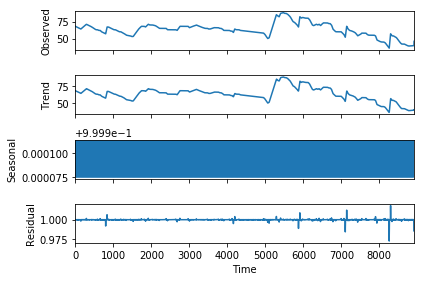

In [34]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(solid1['Soil humidity 1'].values, model='multiplicative' , freq= 12)

fig = decomposition.plot()
plt.show()

In [109]:
new = pd.Series(np.array([1,2,3,4,5,6,7,8,9]))

In [115]:
pd.concat([new.shift(3), new], axis=1) 

,0,1
0,NaN,1
1,NaN,2
2,NaN,3
3,1.0,4
4,2.0,5
5,3.0,6
6,4.0,7
7,5.0,8
8,6.0,9


In [116]:
new.iloc[-3:]

6    7
7    8
8    9
dtype: int32

In [167]:
shifted = pd.concat([train_4['Soil humidity 4'].shift(len(test_4)), train_4['Soil humidity 4']], axis=1) 

In [168]:
shifted.dropna(inplace = True)

In [169]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(shifted.iloc[:,0].values.reshape(-1, 1), shifted.iloc[:,1])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [158]:
pred1 = model.predict(shifted.iloc[-len(test_1):,0].values.reshape(-1, 1))

In [162]:
pred2 = model.predict(shifted.iloc[-len(test_2):,0].values.reshape(-1, 1))

In [166]:
pred3 = model.predict(shifted.iloc[-len(test_3):,0].values.reshape(-1, 1))

In [170]:
pred4 = model.predict(shifted.iloc[-len(test_4):,0].values.reshape(-1, 1))

In [152]:
len(pred1)

1153

In [173]:
result = np.concatenate((pred1 , pred2, pred3, pred4))

In [105]:
model.score(x_test.values.reshape(-1,1) , y_test)

0.0045911564935360305

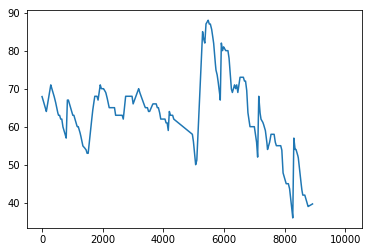

In [71]:
solid1['Soil humidity 1'].plot()

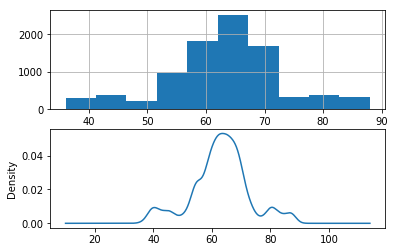

In [73]:
plt.figure(1) 
plt.subplot(211) 
solid1['Soil humidity 1'].hist() 
plt.subplot(212) 
solid1['Soil humidity 1'].plot(kind='kde') 
plt.show()

In [76]:
from statsmodels.tsa.stattools import adfuller

# create a differe
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return pd.Series(diff)

In [80]:
stationary = difference(train_1['Soil humidity 1'].values)

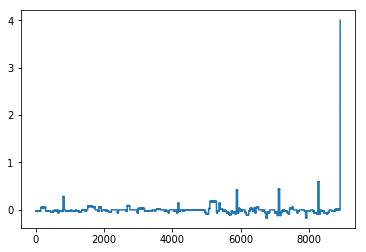

In [81]:
stationary.plot()

In [82]:
result = adfuller(stationary)

In [83]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 1.773457
p-value: 0.998295
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


C:\Users\mxcsy\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


KeyboardInterrupt: 

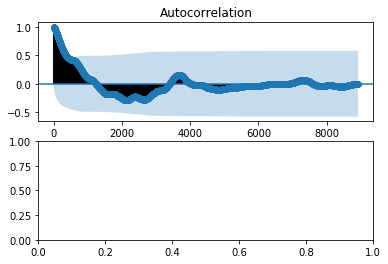

In [84]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure()
plt.subplot(211)
plot_acf(train_1['Soil humidity 1'], ax=plt.gca())
plt.subplot(212)
plot_pacf(train_1['Soil humidity 1'], ax=plt.gca())
plt.show()

In [49]:
start_date_1 = '2019-03-25 22:50:00'
end_date_1 = '2019-03-29 22:50:00'
start_date_2 = '2019-05-25 07:45:00'
end_date_2 = '2019-05-31 09:15:00'
start_date_3 = '2019-04-19 20:15:00'
end_date_3 = '2019-04-23 20:15:00'
start_date_4 = '2019-05-25 07:45:00'
end_date_4 = '2019-05-31 07:45:00'
endend = '2019-05-31 09:20:00'

In [50]:
mask1 = (solid1['timestamp'] >= start_date_1) & (solid1['timestamp'] <= end_date_1)
mask2 = (solid2['timestamp'] >= start_date_2) & (solid2['timestamp'] <= end_date_2)
mask3 = (solid3['timestamp'] >=start_date_3) & (solid3['timestamp'] <= end_date_3)
mask4 = (solid4['timestamp'] >= start_date_4) & (solid4['timestamp'] <= end_date_4)

In [51]:
test_1 = solid1.loc[mask1]
test_2 = solid2.loc[mask2]
test_3 = solid3.loc[mask3]
test_4 = solid4.loc[mask4]

In [100]:
len(test_1)

1153

In [52]:
test_1.head()

,timestamp,Soil humidity 1
8914,2019-03-25 22:50:00,NaN
8915,2019-03-25 22:55:00,NaN
8916,2019-03-25 23:00:00,NaN
8917,2019-03-25 23:05:00,NaN
8918,2019-03-25 23:10:00,NaN


In [53]:
'''train_1 = solid1.drop(solid1.loc[mask1].index)
train_2 = solid2.drop(solid2.loc[mask2].index)
train_3 = solid3.drop(solid3.loc[mask3].index)
train_4 = solid4.drop(solid4.loc[mask4].index)'''

train_1 = solid1.dropna()
train_2 = solid2.dropna()
train_3 = solid3.dropna()
train_4 = solid4.dropna()

In [61]:
all_d = np.concatenate((train_1['Soil humidity 1'].values,train_2['Soil humidity 2'].values, train_3['Soil humidity 3'].values, train_4['Soil humidity 4'].values))

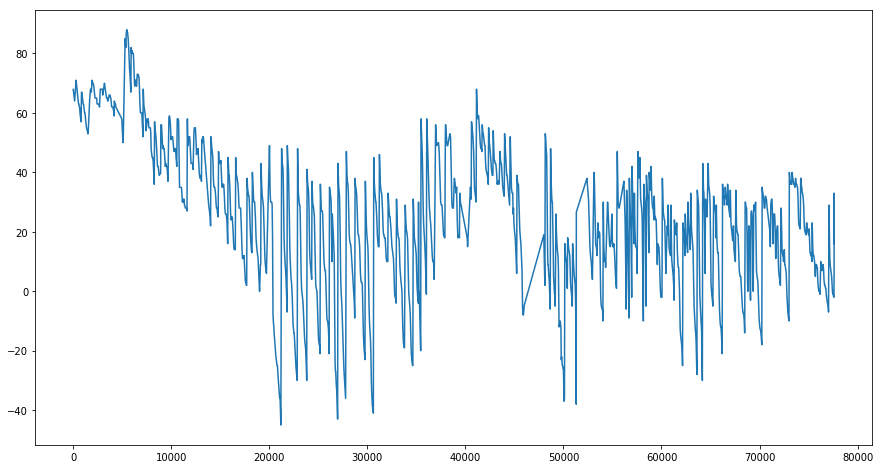

In [183]:
plt.figure(figsize=(15,8))
plt.plot(all_d)

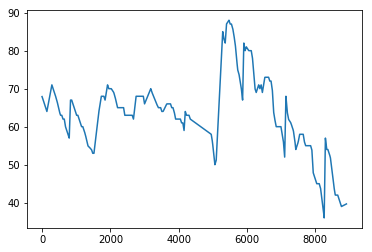

In [72]:
trainone['Soil humidity 1'].plot()

In [73]:
trainone.shape

(8914, 2)

In [63]:
X = train_1['Soil humidity 1'].astype(float).values

In [64]:
train, test = X[:8800] , X[8800:]

In [65]:
test[0]

39.15

In [66]:
from sklearn.metrics import mean_squared_error

def evaluate(test, predictions):
    mse = mean_squared_error(test, predictions)
    rmse = np.sqrt(mse)
    print('RMSE: %.3f' % rmse)

In [67]:
history = [x for x in train]
predictions = list()

In [68]:
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(yhat)
    print('>Predicted=%.3f, Expected=%3.3f' % (yhat, obs))

>Predicted=39.150, Expected=39.150
>Predicted=39.150, Expected=39.160
>Predicted=39.150, Expected=39.160
>Predicted=39.150, Expected=39.170
>Predicted=39.150, Expected=39.170
>Predicted=39.150, Expected=39.180
>Predicted=39.150, Expected=39.180
>Predicted=39.150, Expected=39.190
>Predicted=39.150, Expected=39.190
>Predicted=39.150, Expected=39.190
>Predicted=39.150, Expected=39.200
>Predicted=39.150, Expected=39.200
>Predicted=39.150, Expected=39.210
>Predicted=39.150, Expected=39.210
>Predicted=39.150, Expected=39.220
>Predicted=39.150, Expected=39.220
>Predicted=39.150, Expected=39.230
>Predicted=39.150, Expected=39.230
>Predicted=39.150, Expected=39.240
>Predicted=39.150, Expected=39.240
>Predicted=39.150, Expected=39.250
>Predicted=39.150, Expected=39.250
>Predicted=39.150, Expected=39.250
>Predicted=39.150, Expected=39.260
>Predicted=39.150, Expected=39.260
>Predicted=39.150, Expected=39.270
>Predicted=39.150, Expected=39.270
>Predicted=39.150, Expected=39.280
>Predicted=39.150, E

In [69]:
evaluate(test, predictions)

RMSE: 0.768


In [70]:
from statsmodels.tsa.arima_model import ARIMA

history = [x for x in train]
predictions = list()

for i in range(2):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(yhat)
    print('>Predicted=%.3f, Expected=%3.3f' % (yhat, obs))

>Predicted=39.159, Expected=39.150
>Predicted=39.168, Expected=39.160


In [110]:
evaluate(test, predictions)

RMSE: 0.510


In [112]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [118]:
history = [x for x in train]
predictions = list()

for i in range(len(test)):
    model = ExponentialSmoothing(history , trend = 'additive')
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(yhat)
    print('>Predicted=%.3f, Expected=%3.3f' % (yhat, obs))

>Predicted=39.159, Expected=39.150
>Predicted=39.168, Expected=39.160
>Predicted=39.178, Expected=39.160
>Predicted=39.187, Expected=39.170
>Predicted=39.196, Expected=39.170
>Predicted=39.206, Expected=39.180
>Predicted=39.215, Expected=39.180
>Predicted=39.224, Expected=39.190
>Predicted=39.234, Expected=39.190
>Predicted=39.243, Expected=39.190
>Predicted=39.252, Expected=39.200
>Predicted=39.261, Expected=39.200
>Predicted=39.271, Expected=39.210
>Predicted=39.280, Expected=39.210
>Predicted=39.289, Expected=39.220
>Predicted=39.299, Expected=39.220
>Predicted=39.308, Expected=39.230
>Predicted=39.317, Expected=39.230
>Predicted=39.326, Expected=39.240
>Predicted=39.336, Expected=39.240
>Predicted=39.345, Expected=39.250
>Predicted=39.354, Expected=39.250
>Predicted=39.364, Expected=39.250
>Predicted=39.373, Expected=39.260
>Predicted=39.382, Expected=39.260
>Predicted=39.392, Expected=39.270
>Predicted=39.401, Expected=39.270
>Predicted=39.410, Expected=39.280
>Predicted=39.419, E

KeyboardInterrupt: 

In [117]:
evaluate(test, predictions)

RMSE: 0.305


In [174]:
rr = pd.read_csv('SampleSubmission.csv')

In [175]:
rr.Values = result

In [176]:
rr.to_csv('one.csv', index = False)